# Reinforcement Learning

<img src="figures/demo_state.png" style="float:left;margin-right:20px;" alt="Example State">

## Motivation

+ Classification of individual data instances
+ More complex problems: 
    1. No clearly defined class labels
    2. Better or worse, instead of true or false
    3. Learning from a sequence of trials

In supervised learning or classification, we focus on an individual data instance at a time and try to make a prediction or decision based on features of that single instance. While we may have built a model based on a large number of training samples, testing is conducted more or less on an isolated data instance, where the result of other test data has no impact. 

In reality, however, we have many situations and problems that are much more complex than what can be treated as classification for a number of reasons. For one, there might not be a clearly defined set of labels or training data for supervised learning. Perhaps, it is not possible to tell whether an action or decision is right (true) or wrong (false) under the current circumstance. Rather, it should be focused on what is better (improving) or worse. So the objective has more to do with optimaization than classification. 

More important, it normally takes more than one trials to figure out what is working vs. what is not. So whatever learning model we employ for tasks will have to analyze a sequence of actions and returns to identify an effective model. 

Example, a robot learning to play soccer: 
+ When to dribble? When to pass a ball? 
+ Timing is key, e.g. a sequence of (teamwork) actions leading to a goal

<img src="figures/soccer_game.jpg" style="width:500px;" alt="Soccer Game">

Imagine if you are a striker, the success of your **actions** (e.g. passing, dribbling, and scoring) depends on your interactions with the **environment**, for example: 
+ Who has the ball and where the ball is going
+ Where your teammates are or running toward
+ Where players on the other team are and/or moving to
...

It is a very dynamic environment that is constantly changing and you need to be alert about what may happen next so you can be there in the right place at the right moment, e.g. to receive the ball and score. 

## Reinforcement Learning

The soccer game illustrates several important concepts in Reinforcement Learning: 

In [128]:
from graphviz import Digraph
dot = Digraph(comment="Reinforcement Learning", graph_attr={'rankdir':'LR'}, engine='dot')
dot.node('A', 'Agent', shape='circle')
# with dot.subgraph(name='child', node_attr={'shape': 'box'}) as c:
#     c.node('c', 'Action', shape='box')
#     c.node('s', 'State', shape='egg')
#     c.node('r', 'Reward', shape='egg')
dot.node('E', 'Environment', shape='circle')
# dot.edge('A', 'c')
# dot.edges(['Ac', 'cE', 'sA', 'rA', 'Es', 'Er'])
dot.edge('A', 'E', label='Action')
dot.edge('E', 'A', label='State')
dot.edge('E', 'A', label='Reward')

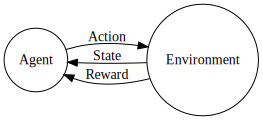

In [129]:
dot

1. ```Agent``` is a software program, just like a soccer player, who learns and adapts to perform ```Actions```, e.g. to play in a soccer game. 
2. ```Environment``` refers to the entire dynamically changing setting where agents operate, e.g. the soccer field, players, referees, and their interactions under the rules. 
3. ```State``` of the environment such as the location of the ball and moving speeds of players. 
4. ```Reward``` or ```Penalty``` as a result of an agent's action. For example, there are big rewards such as scoring a goal or penalties such as receiving a red card; but there are also minor rewards such as passing the ball accurately and being able to have longer procession, which may lead to opportunities to score. 

## Q-Learning

Through actions and interactions (state and reward) with the environment, it is possible for an agent to gain knowledge and improve its actions. We refer to as

> The ```Policy```: the method (strategy) an agent uses to act on its knowledge to maximize its long-term rewards. 

```Q-Learning``` is a reinforcement learning policy, in which the agent keeps track of **rewards** associated with each **state** and **action**. 

### Q-Table

Specifically, the agent stores rewards in a so-called **Q-table** like this: 

|        | $A_1$ | $A_2$ | $A_3$ | .. | $A_m$ |
|--------|-------|-------|-------|----|-------|
| $S_1$  |   0   |   0   |   0   |    |   0   |
| $S_2$  |   0   |   0   |   0   |    |   0   |
| ..     |   0   |   0   |   0   |    |   0   |
| $S_n$  |   0   |   0   |   0   |    |   0   |

where:
+ $S_1, S_2, .., S_n$ are all possible states (rows). 
+ $A_1, A_2, .., A_m$ are all possible actions (columns) for each state. 

The Q-table is initiated with $0$ values and gets updated whenever the agent performs an action and receives a reward (or penalty) from the environment. 

Suppose at time $t$, the agent is at the state of $s_t$, performs an action $a_t$ and receives a reward of $r_t$. 

Here is one strategy to update the Q-table: 

\begin{eqnarray}
Q'(s_t, a_t) & \leftarrow & (1-\beta) Q(s_t, a_t) + \beta (r_t + \gamma \max_a{Q(s_{t+1},a)}) 
\end{eqnarray}

where: 
+ $\beta \in [0,1]$ is the learning rate. A greater $\beta$ leads to more aggressive updating. 
+ $\gamma \in [0,1]$ is the discount factor for future rewards. A greater $\gamma$ tends to put more emphasis on long-term rewards. 

### Exploration vs. Exploitation

An agent learns from trials and errors. So learning requires (random) **exploration** in the environment. At some points, the agent may gain "sufficient" knowledge to make wiser decisions based on a trained Q-table. However, in order to allow opportunities to continued learning, one should avoid complete **exploitation** of Q-table for action selection. 

For the tradeoff, we introduce a third parameter $\epsilon$ (probability), at time $t$: 

1. With $\epsilon$ probability, the agent selects a random action. 
2. With $1 - \epsilon$ probability, the agent selects the action with the maximum reward for state $s_t$ in the Q-table: $a_t = \underset{a}{\operatorname{argmax}}{r(s_t,a)}$

## Taxi Cab

In [174]:
#############################################
# Some common functions to show simulations
#############################################

import re
from IPython.display import clear_output
from time import sleep
from IPython.display import HTML

# Convert ASCII output to HTML (more graphical)
def str2html(out):
    out2 = out.replace(":", "~")
    # 4 locations
#     out2 = out2.replace("|R","|<span style='color:red;vertical-align:middle;'>R</span>")
#     out2 = out2.replace("|Y","|<span style='color:yellow;vertical-align:middle;'>Y</span>")
    out2 = out2.replace("\x1b[34;1m","<div class='pickup'>")
    out2 = out2.replace("\x1b[35m","<div class='target'>")
    # taxi cab
    out2 = out2.replace("\x1b[42m","<div class='cab_loaded'>")
    out2 = out2.replace("\x1b[43m","<div class='cab'>")
#     out2 = out2.replace("\x1b[43mR","<div class='cab'>")
#     out2 = out2.replace("\x1b[43mG","<div class='cab'>")
#     out2 = out2.replace("\x1b[43mG","<div class='cab'>")
#     out2 = out2.replace("\x1b[43mY","<div class='cab'>")
    out2 = out2.replace("\x1b[0m","</div>")
    
    
    # table cells
    out2 = out2.replace("\n+---------+","\n</table>")
    out2 = out2.replace("+---------+\n","<table style='border:solid 1px black;'>\n")
    out2 = out2.replace("\n|", "\n<tr><td class='street' style='text-align:center;'>")
    out2 = out2.replace("|\n", "</td></tr>\n")
    out2 = out2.replace("|", "</td><td class='stwall' style='border-left: solid 3px black;text-align:center;'>")
    out2 = out2.replace("~", "</td><td class='street' style='border-left: dashed 2px #bbb;text-align:center;'>")
    css = """
          <style>
            .street {
              width: 60px;
              height: 60px;
              text-align: center;
              border-left: dashed 2px white;
            }
            .stwall {
              width: 60px;
              height: 60px;
              text-align: center;
                  border-left: solid 3px black;
              }
              .pickup {
              width: 50px;
              height: 50px;
              border-radius: 50%;
              font-size: 20px;
              color: #fff;
              line-height: 50px;
              text-align: center;
              background: blue
            }
            .target {
              width: 50px;
              height: 50px;
              border-radius: 50%;
              font-size: 20px;
              color: #fff;
              line-height: 50px;
              text-align: center;
              background: red
            }
            .cab {
               background-image: url(figures/cab2.png);
               background-size: 20px;
               background-repeat: no-repeat;
               background-position: center; 
               height: 45px;
               width: 45px;
               border: dashed 2px blue;
            }
            .cab_loaded {
               background-image: url(figures/cab2.png);
               background-size: 20px;
               background-repeat: no-repeat;
               background-position: center; 
               height: 45px;
               width: 45px;
               border: solid 2px red;
            }

            </style>"""
    return css + "\n" + out2

# print simulation frames
def print_frames(frames, offset, limit, sleep_time):
    rewards = 0
    for i, frame in enumerate(frames): 
        if i>=offset: 
            rewards += frame['reward']
            clear_output(wait=True)
            out2 = str2html(frame['frame'])

    #         print(f"Timestep: {i+1}")
    #         print(f"State: {frame['state']}")
    #         print(f"Action: {frame['action']}")
    #         print(f"Reward: {frame['reward']}")
            out2 = """
            {0}
            <table>
                <tr><td>Timestep: </td><td>{1}</td></tr>
                <tr><td>State: </td><td>{2}</td></tr>
                <tr><td>Action: </td><td>{3}</td></tr>
                <tr><td>Reward: </td><td>{4}</td></tr>
                <tr><td>Total Reward: </td><td>{5}</td></tr>
            </table>""".format(out2, i+1, frame['state'], frame['action'], frame['reward'], rewards)
            display(HTML(out2))
            sleep(sleep_time)
            if limit>0 and i>(offset+limit): 
                # print(frame['frame'])
                break

# visualize the frames side by side
def compare_frames(t1, frames1, t2, frames2, offset, limit, sleep_time): 
    rewards1, rewards2 = 0, 0
    for i, frame1 in enumerate(frames1): 
        if i>=offset: 
            frame2 = frames2[i]
            rewards1 += frame1['reward']
            rewards2 += frame2['reward']
            
            clear_output(wait=True)
            # first frame
            out1 = str2html(frame1['frame'])
            out1 = """
            <td>
            <h1>{0}</h1>
            {1}
            <table>
                <tr><td>Timestep: </td><td>{2}</td></tr>
                <tr><td>State: </td><td>{3}</td></tr>
                <tr><td>Action: </td><td>{4}</td></tr>
                <tr><td>Reward: </td><td>{5}</td></tr>
                <tr><td>Total Reward: </td><td>{6}</td></tr>
            </table>
            </td>""".format(t1, out1, i+1, frame1['state'], frame1['action'], frame1['reward'], rewards1)

            # second frame
            out2 = str2html(frame2['frame'])
            out2 = """
            <td>
            <h1>{0}</h1>
            {1}
            <table>
                <tr><td>Timestep: </td><td>{2}</td></tr>
                <tr><td>State: </td><td>{3}</td></tr>
                <tr><td>Action: </td><td>{4}</td></tr>
                <tr><td>Reward: </td><td>{5}</td></tr>
                <tr><td>Total Reward: </td><td>{6}</td></tr>
            </table>
            </td>""".format(t2, out2, i+1, frame2['state'], frame2['action'], frame2['reward'], rewards2)


            display(HTML("<table><tr>" + out1 + "\n" + out2 + "</tr></table>"))
            sleep(sleep_time)
            if limit>0 and i>(offset+limit): 
                # print(frame['frame'])
                break
    

The ```Taxi``` task in OpenAI's ```gym``` is a simplified problem of driving a taxi cab in city blocks. 

Here is an visualization of city blocks, more like a parking lot: 

In [ ]:
import gym
env = gym.make("Taxi-v3")
env.reset()
out_text = env.render(mode="ansi")
out_html = str2html(out_text)

In [179]:
display(HTML(out_html))

### Problem

Major tasks of the taxi cab (agent) include: 

<img src="figures/taxi.png" style="float:left;margin-right:20px;" alt="Example State">

1. Pick up a passenger from a location (in blue color), at R, G, B, or Y. 
2. Drop off the passenger at the target location (in red), at R, G, B, or Y. 
3. Travel as little as possible to complete the tasks. 

In each state, the cab can take any of the following actions: 

<img src="figures/taxi.png" style="float:left;margin-right:20px;" alt="Taxi">

0. Move south
1. Move north
2. Move east
3. Most west
4. Pickup passenger
5. Dropoff passenger

There are related rewards and penalties for each action: 

<img src="figures/taxi.png" style="float:left;margin-right:20px;" alt="Taxi">

+ $-1$ point penalty for each action/move (just like gasoline consumption). 
+ $-10$ points penalty for illegal pickup or dropoff. 
+ $20$ points reward for a successful delivery of the passenger. 

For example, given the following ```state``` where the cab is to: 
1. Pick up passenger at pickup location (blue); 
2. Drive to the destination at destination (red); 
3. Drop off the passenger. 

In [400]:
env.reset()
env.s = 328

In [401]:
display(HTML(str2html(env.render(mode="ansi"))))

### Action without Learning

How can the agent (cab) learn to perform the tasks? 

We will first start with a dummy verion where the cab: 
+ simply selects a random action
+ and does not learn

```python
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)
```

In [140]:
epochs = 0
penalties, reward = 0, 0
frames = []
done = False

while not done: 
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)
    if reward == -10: 
        penalties += 1
        
    frames.append({
        'frame': env.render(mode='ansi'), 
        'state': state, 
        'action': action, 
        'reward': reward
    })
    
    epochs += 1

print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 200
Penalties incurred: 66


In [406]:
print_frames(frames, 0, 0, 0.2)

You can tell that the cab is fooling around and its moves and actions are random and meaningless. By looking at the behavior of the cab, we can hardly have confidence in it to develop any intelligence and to perform a better job. 

The strategy of random actions does not work!

### Explore and Learn

Now let's follow the Q-Learning idea so the agent (cab) can learn from its failures and successes. In particular, we would like the agent to remember what works vs. what does not, that is: 

What are past ```rewards``` (or penalties) for each ```action``` taken in each ```state```. 

We know there are $6$ different actions the cab can select from. But how many states are there? 

Here are factors to be considered in the combinations of states: 

<img src="figures/taxi.png" style="float:left;margin-right:20px;" alt="Example State">

1. The cab can be at one of the $5\times5$ blocks. 
2. The passenger can be at one of the $4$ pickup locations (RGBY) or in the cab: $\times5$. 
3. The cab is to drop off the passenger at one of the $4$ locations: $\times4$. 

The total number of states: $5\times5\times5\times4=500$. 

So we need to create a Q-table of $500$ rows (states) $\times$ $6$ columns (actions):

In [150]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])

We start with a Q-table like this (first 10 states): 

In [151]:
q_table[0:10]

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

Each row has $6$ columns because there is one value for each of the $6$ actions. We only show first 10 states here but remember there are $500$ rows (states) in total. 

Now we will let the agent (cab) explore a little bit, with $\epsilon=0.1$. 

Given the current ```state```, the agent has: 
+ $10\%$ probability to explore and select random actions.
```python
action = env.action_space.sample()
```

+ $90\%$ probability to select the best action based on the Q-table (memory)
```python
action = np.argmax(q_table[state])
```

After the action, the agent (cab) receives a ```reward``` and updates its Q-table: 

\begin{eqnarray}
Q'(s_t, a_t) & \leftarrow & (1-\beta) Q(s_t, a_t) + \beta (r_t + \gamma \max_a{Q(s_{t+1},a)}) 
\end{eqnarray}

where: 
+ $\beta = 0.1$ is the learning rate
+ $\gamma = 0.6$ is the discount for future rewards
+ $Q(s_t, a_t)$ is the value in Q-table for state $s_t$ and action $a_t$
+ $r_t$ is the the received reward (or penalty)
+ $Q'(s_t, a_t)$ denotes the updated value in Q-table

In [182]:
%%time
"""Agent under training"""

import random
from IPython.display import clear_output

# Hyperparameters
a = 0.1 # alpha
g = 0.6 # gamma
e = 0.1 # epsilon

# keeping track of
all_epochs = []
all_penalties = []

# Train the cab for 100,000 tasks
for i in range(1, 10**5+1):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    done = False
    
    while not done: 
        if random.uniform(0, 1) < e: 
            action = env.action_space.sample() # random exploration
        else: 
            action = np.argmax(q_table[state]) # act on knowledge
        
        next_state, reward, done, info = env.step(action)
        next_max = np.max(q_table[next_state])
        
        old_value = q_table[state, action]
        new_value = (1 - a) * old_value + a * (reward + g * next_max)
        q_table[state, action] = new_value
        
        if reward == -10: 
            penalties += 1
            
        state = next_state
        epochs += 1
    if i % 100 == 0: 
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Agent is trained!")

Episode: 100000
Agent is trained!
CPU times: user 45.6 s, sys: 7.67 s, total: 53.2 s
Wall time: 49.4 s


After training the agent (cab) for: 
+ $100,000$ tasks
+ about 1 minute on a Mac 

we obtain the following Q-table: 

In [156]:
np.set_printoptions(precision=1)
print(q_table[0:10])

[[  0.    0.    0.    0.    0.    0. ]
 [ -2.4  -2.4  -2.4  -2.4  -2.3 -11.4]
 [ -1.9  -1.5  -1.9  -1.5  -0.8 -10.5]
 [ -2.4  -2.3  -2.4  -2.3  -2.1 -11.3]
 [ -2.5  -2.5  -2.5  -2.5  -9.7  -9.7]
 [  0.    0.    0.    0.    0.    0. ]
 [ -2.5  -2.5  -2.5  -2.5  -9.9  -9.9]
 [ -2.5  -2.5  -2.5  -2.5  -9.3  -9.9]
 [ -2.3  -2.3  -2.4  -2.3  -8.7  -7.3]
 [ -2.5  -2.5  -2.5  -2.5 -10.8  -8.8]]


The values are different from the initial values but how useful are they? 

### Act on Knowledge

Let's test the trained model (with an updated Q-table) for $100$ tasks (episodes): 

In [183]:
total_epochs, total_penalties = 0, 0
episodes = 100
trained_frames = []

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 1
    
    done = False
    
    while not done: 
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        
        trained_frames.append({
            'frame': env.render(mode='ansi'), 
            'state': state, 
            'action': action, 
            'reward': reward
        })
        
        if reward == -10: 
            penalties += 1
            
        epochs += 1
        
    total_penalties += penalties
    total_epochs += epochs

print(f"After {episodes} spisodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

After 100 spisodes:
Average timesteps per episode: 13.14
Average penalties per episode: 0.0


Summary of the test, After 100 episodes:
+ Average timesteps per episode: 12.85
+ Average penalties per episode: 0.0

In [407]:
print_frames(trained_frames, 0, 100, 0.5)

## How did the agent learn?

Example, ```State 0```: 

<img src="figures/demo_state.png" style="float:left;margin-right:20px;" alt="Example State">

+ Cab location: $(2, 3)$
+ Pickup location ```B```: $3$
+ Dropoff location ```G```: $1$

How does the cab learn to go ```south``` first to maximize its long-term reward? 

In [287]:
env.encode(2,3,3,1)

273

### Branches

At each state, there are $6$ actions to perform, which can be visualized as: 

In [314]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.balanced_tree(6, 1)
names = {
    0: "State",
    1: "South",
    2: "North",
    3: "East",
    4: "West",
    5: "Pickup",
    6: "Dropoff"
}
G = nx.relabel_nodes(G, names)

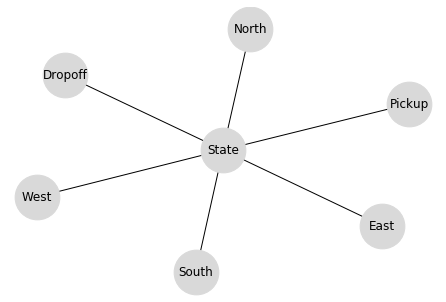

In [315]:
nx.draw(G, with_labels=True, node_size=2000, node_color='0.85', alpha=1)
plt.show()

By taking an action, the agent (possibly) moves to another state and, from there, can select another action from the six. 

This can be visualized as new branches from each one of the actions taken: 

In [ ]:
G = nx.balanced_tree(6, 2)
names = {
    0: "State",
    1: "South",
    2: "North",
    3: "East",
    4: "West",
    5: "Pickup",
    6: "Dropoff"
}
G = nx.relabel_nodes(G, names)

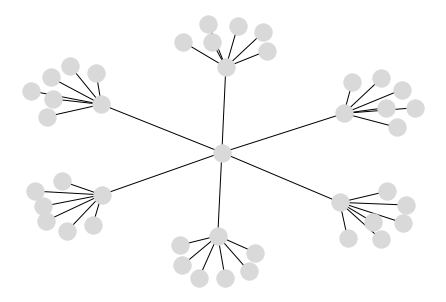

In [319]:
nx.draw(G, with_labels=False, node_size=300, node_color='0.85', alpha=1)
plt.show()

As the agent goes down the path, the number of potential choices and actions increase exponentially. How does the agent get rewarded for one of the most efficient path? 

In particular, how does the agent maximize its **long-term award** by moving ```south first``` in the following step? 

<img src="figures/demo_state.png" style="float:left;margin-right:20px;" alt="Example State">

The path is equivalent to: 

In [395]:
def show_graph():
    G = nx.path_graph(10)
    names = {
        0: "0",
        1: "1.South",
        2: "2.South",
        3: "3.Pickup",
        4: "4.East",
        5: "5.North",
        6: "6.North",
        7: "7.North",
        8: "8.North",
        9: "9.Dropoff"
    }

    positions = {
        "0": (30,60),
        "1.South": (30,40),
        "2.South": (30,20),
        "3.Pickup": (40,20),
        "4.East": (50,20),
        "5.North": (55,30),
        "6.North": (60,40),
        "7.North": (65,50),
        "8.North": (70,60),
        "9.Dropoff": (75,70)
    }

    colors = ['0.75','0.75','0.75','lightblue','0.75','0.75','0.75','0.75','0.75','orange']

    G = nx.relabel_nodes(G, names)
    plt.figure(figsize=(12, 6))
    plt.xlim(25,80)
    plt.ylim(10,90)
    nx.draw(G, with_labels=True, pos=positions, node_size=2200, node_color=colors, alpha=1)
    plt.show()

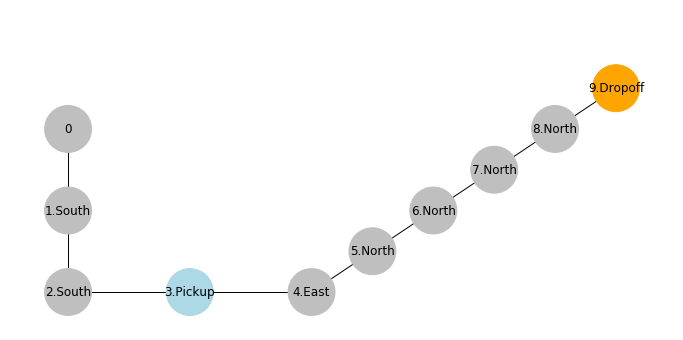

In [396]:
show_graph()

For the sake of discussion, suppose values in Q-table are all the same $0$. 

<img src="figures/0_south.png" style="float:left;margin-right:20px;" alt="0 South">

By taking the action ```south``` at state ```0```: 
1. The agent receive a penalty of $-1$. 
2. It will update its Q-value for ```state 0``` with action ```south```. 

\begin{eqnarray}
Q'(0, south) \
& \leftarrow & (1-\beta) Q(0, south) + \beta (r_t + \gamma \max_a{Q(s_{t+1},a)}) \\
         & = & 0.9 \times 0 + 0.1\times(-1 + 0.6\times 0)\\
         & = & - 0.1
\end{eqnarray}

Given: 
+ Learning rate: $\beta = 0.1$
+ Future award discount: $\gamma = 0.6$

So every $state \to action$ on the shown path will receive the same penalty of $-1$ and updated with a new value of $-0.1$ in the Q-table. One may think with this penalty along the path, the agent may not favor similar actions in the future. 

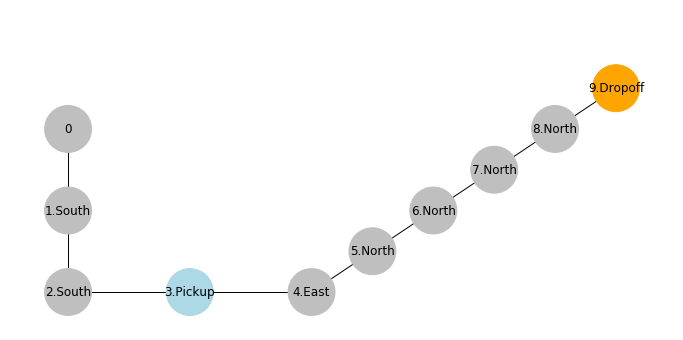

In [404]:
show_graph()

However, when the cab reaches to the destination and selects an ```dropoff``` action at ```state 8```: 

<img src="figures/8_dropoff.png" style="float:left;margin-right:20px;" alt="0 South">

1. It receives a reward of $20$
2. It updates its Q-values for action ```dropoff``` at state ```8```. 

\begin{eqnarray}
Q'(8, dropoff) \
& \leftarrow & (1-\beta) Q(8, dropoff) + \beta (r_t + \gamma \max_a{Q(s_{t+1},a)}) \\
         & = & 0.9 \times 0 + 0.1\times(20 + 0.6\times 0)\\
         & = & 2
\end{eqnarray}

With the new updated value of $2$ for a ```dropoff``` at state ```8```, the agent will favor this specific action at this specific state in the future. But how about the previous actions at previous states leading to the dropoff? How do they get rewarded as well? 

Remember in the Q-table updating policy, we have: 

\begin{eqnarray}
Q'(s_t, a_t) & \leftarrow & (1-\beta) Q(s_t, a_t) + \beta (r_t + \gamma \max_a{Q(s_{t+1},a)}) 
\end{eqnarray}

For example, next time, when an action at state ```7``` is being updated: 
<img src="figures/7_north.png" style="float:left;margin-right:20px;" alt="0 South">

\begin{eqnarray}
Q'(7, North) 
& \leftarrow & ... + \beta \gamma \max_a{Q(s_{t+1}, a)} \\
         & = & ... + 0.1\times0.6 \max_a{Q(s_{t+1}, a)}
\end{eqnarray}

Because: 
1. Action ```north``` at state ```7``` leads to state ```8```
2. The most rewarding action at state ```8``` is to ```dropoff```, with Q-value $2$

To update $Q'(7, north)$, the future reward becomes: 
\begin{eqnarray}
0.06 \max_a{Q(s_{t+1}, a)} 
& = & 0.06 \max_a{Q(8,a)} \\
& = & 0.06 \times Q(8, dropoff) \\
& = & 0.06 \times 2
\end{eqnarray}

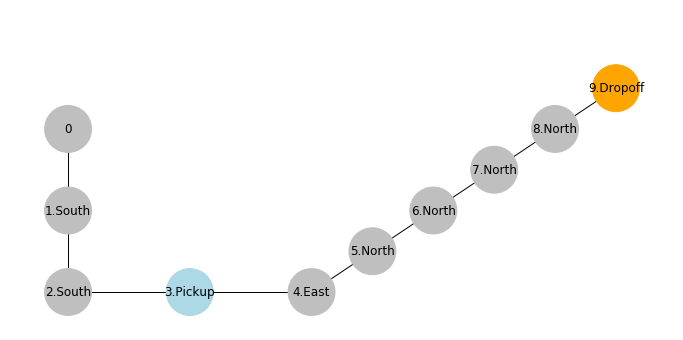

In [397]:
show_graph()

The main takeaway here is that a reward at one state will be "backpropagated" to an earlier $state, action$ leading to that favorable state. With a sufficient number of iterations to train the agent, the rewards or penalties will be carried all the way back to even earlier state-actions. 

In the end, the reward received for ```dropoff``` at state ```8``` will have an impact on going ```south``` at state ```0```, even though they are only remotely connected. Overall, the Q-learning policy will help improve the taxi cab's behavior toward greater long-term rewards. 

### Comparison

Let's compare the dummy cab (random model) and the trained model side by side:

In [408]:
compare_frames("Random Model", frames, "Trained Model", trained_frames, 0, 200, 0.5)

### Conclusion

It is easy to tell that while the random model continues to lose and accumulate penalties, the trained model is much smarter in knowing how to move directly to pickup and dropoff locations to maximize its rewards. 

Applications of Q-learning certainly go beyond the simplified taxi cab example here. A recent example is the AlphaGo that defeated the best human player. One can also imagine a similar reinforcement learning policy to be used by a smart floor vaccum to maximize the amount of dirt it can pick up to make your rooms clean. 

## References

+ Wlfgang Ertel (2017). Introduction to Artificial Intelligence. Chapter 10 Reinforcement Learning. Springer. 
+ Miroslav Kubat (2017). An Introduction to Machine Learning. Chapter 17. Reinforcement learning. Springer. 